In [25]:
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from torch.autograd import Variable


In [26]:
images = np.load("./images.npy")
labels = np.load("./labels.npy")

input_labels = (labels > 0).astype(dtype=np.float)
images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))

#normalize the input data.
images = images/255
images = images.astype(dtype=np.float)

In [27]:
train_images = torch.Tensor(images[0:40000, : ])
cv_images = torch.Tensor(images[40000:45000, : ])
test_images = torch.Tensor(images[45000:50000, : ])

#split the labels in to train, validation and test data
train_labels = torch.FloatTensor(input_labels[0:40000])
cv_labels = torch.FloatTensor(input_labels[40000:45000])
test_labels = torch .FloatTensor(input_labels[45000:50000])

In [28]:
def accuracy(y,y_hat):
    count = 0;
    for i in range(y.shape[0]):
        if y[i] == y_hat[i]:
            count += 1
    return count/y.shape[0]

def accuracy_random_train():

    import random
    import numpy as np


    x =random.sample(range(0,40000),1000)
    y = np.empty(1000)
    y_hat = np.empty(1000)


    index=0
    
    for i in x:

        images_random = Variable(train_images[i].view(1,676), requires_grad=False)
        y[index] = train_labels[i]

        y_pred = torch.sigmoid(torch.mm(images_random, W))

        res = y_pred.data[0][0]
    

        if res > 0.5:
            act_label = 1
        else:
            act_label = 0

        y_hat[index] = act_label
        index += 1

    acc = accuracy(y,y_hat)
   
  
    return acc


    

def accuracy_random_validation():

    import random
    import numpy as np


    x =random.sample(range(0,5000),1000)
    y = np.empty(1000)
    y_hat = np.empty(1000)


    index=0
    
    for i in x:

        images_random = Variable(cv_images[i].view(1,676), requires_grad=False)
        y[index] = cv_labels[i]

       
        y_pred = torch.sigmoid(torch.mm(images_random, W))

        res = y_pred.data[0][0]
    

        if res > 0.5:
            act_label = 1
        else:
            act_label = 0

        y_hat[index] = act_label
        index += 1

    acc = accuracy(y,y_hat)
   
  
    return acc



In [29]:
dtype = torch.FloatTensor
input_size = 40000
D_in = train_images.shape[1]
online_learning_rate = 0.001
online_training_iterations = 1



size = (online_training_iterations * input_size) / 100
index = 0

# N dimensional arrays to store training and validation accuracies for every 100 steps
accuracy_train = []
accuracy_valid = []

W = Variable(torch.randn(D_in, 1).type(dtype), requires_grad = True)

while (online_training_iterations >= 0):
    for t in range(input_size):
        
        x = Variable(train_images[t].view(1,676), requires_grad=False)
        y = train_labels[t]
        
        y_pred = torch.sigmoid(torch.mm(x, W))
        
        #loss = -(y * torch.log(torch.sigmoid(torch.mm(x, W))) + 
         #        (1-y) * torch.log(torch.sigmoid(-torch.mm(x, W))))
        
        loss = -(y * torch.log(y_pred) +
                 (1-y) * torch.log(1 - y_pred))
        
        if t%100 == 0:
            accuracy_train.append(accuracy_random_train())
            accuracy_valid.append(accuracy_random_validation())
            #index += 1
    
        loss.backward()
        W.data -= online_learning_rate * W.grad.data
        W.grad.data.zero_()
        W.data = W.data/torch.norm(W.data)
    online_training_iterations -= 1

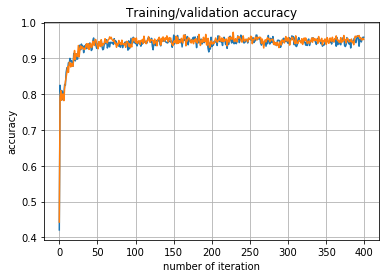

In [30]:
import matplotlib.pyplot as plt


t = np.arange(0,400,1)

s = accuracy_train[0:400]
k = accuracy_valid[0:400]
plt.plot(t, s, t, k)

plt.xlabel('number of iteration')
plt.ylabel('accuracy')
plt.title('Training/validation accuracy')
plt.grid(True)

plt.show()

Is this over fitting:

    From the plot above there is no over fitting here.The accuracies are similar both cases although there are minor fluctuations in the trend